# Example of cut and flow analysis, case without solute transport

First, indicate where are the hydroroot files unless you installed Hydroroot via conda

In [26]:
import sys; print('Python %s on %s' % (sys.version, sys.platform))
sys.path.extend(['../src'])
# to display inline plots in the notebook
%matplotlib inline


Python 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:58:50) 
[GCC 10.3.0] on linux


# Before running the script

- prepare the input yaml file see for example hydroroot/example/parameters_Ctr-3P2.yml
- add the experimental data point to the comma separated csv file data/cnf_data.csv

## Yaml file:
It contains different input categories that are explained in the example hydroroot/example/parameters_Ctr-3P2.yml

## the cnf_data file:
csv file containing cut and flow data with the following columns:
- arch: name of the architecture file without extension. The file given in 'input_file' of the yaml file
- dP_Mpa: column with the working cut and flow pressure
- J0, J1, ..., Jn: columns containing the flux values, 1st for the full root, then 1st cut, 2d cut, etc.
- lcut1, ...., lcutn: columns containing the maximum length to the base after each cut, 1st cut, 2d cut, etc. (not length for full root) 
- last columns **used only if dP is not constant**:
    - dP0, dP1,.., dPn: containing the working pressure of each steps: full root, 1st cut, 2d cut, etc.sample name that must be contained in the 'input_file' of the yaml file

# Run the script: direct simulation
- argument '-o': name of the output csv file

Simulation runs:  1
#############################
Exp03_P2.txt 0.434 174.7 3.979 0.005643500494241343 0.10353098834266657
Exp03_P2.txt 0.3717 174.7 3.915 0.005432385467920032 0.10453111364470544
Exp03_P2.txt 0.2966 174.7 3.829 0.005171922304196114 0.10759915265933087
Exp03_P2.txt 0.2493 174.7 3.694 0.004912382768712372 0.11072095912537126
Exp03_P2.txt 0.2035 174.7 3.468 0.0045468898793936275 0.11882128745122093
Exp03_P2.txt 0.1358 174.7 2.947 0.0037846326874823354 0.18539093509833077


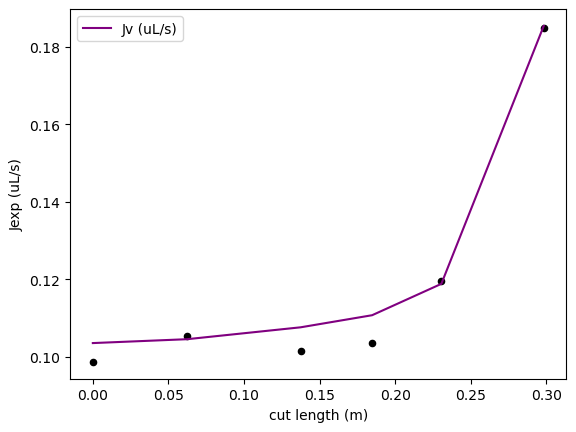

running time is  1.6174218654632568


<Figure size 640x480 with 0 Axes>

In [35]:
%run adjustment_K_and_k.py parameters_Ctr-3P2.yml -o results.csv

# Display architecture
Options:
- cut='tot' is the full root, then cut is the cut length
- prop: property to display
- perspective: activate the zoom
- azimut: axial rotation
- elevation: rotation with the root base as center of rotation
- line_width: lines width

In [38]:
plot_architecture()

interactive(children=(Dropdown(description='cut', options=('tot', '0.3717', '0.2966', '0.2493', '0.2035', '0.1…

# Run adjustment
- adjust the radial and axial conductance
- argument:
    - '-op': indicate to run optimization
    - '-o': name of the output csv file

Simulation runs:  1
#############################
finished minimize ax, ar       fun: 1.2055217303236385e-05
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-7.53405754e-06, -5.53654853e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([0.07736095, 0.38216982])
*******************************************************************************


/home/fabrice/miniconda2/envs/hydroroot39/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


finished minimize Kx      fun: 6.96440437133329e-06
     jac: array([ 8.41158547e+00, -1.10033369e-05,  2.59417099e-05, -3.99447310e-06,
       -4.28871219e-04,  9.82036094e-05,  1.33166143e-04,  1.69470022e-04,
        1.04623000e-04])
 message: 'Optimization terminated successfully'
    nfev: 262
     nit: 25
    njev: 25
  status: 0
 success: True
       x: array([1.00000000e-20, 4.53642945e-03, 3.93642945e-03, 7.02081511e-03,
       9.72423861e-03, 8.52423861e-03, 7.32423861e-03, 6.12423861e-03,
       4.92423861e-03])
Simu,  14.26257775783438 6.956140671397005e-06 14.043120003149928 dk0 =  0.048161706091141135 dKx =  3.7243058225192716e-05
finished minimize Kx      fun: 6.954443991083612e-06
     jac: array([ 5.79639169e+00, -1.98245982e-05,  1.19610766e-05, -1.77566031e-05,
       -4.40426153e-04,  8.80740097e-05,  1.26258963e-04,  1.48123178e-04,
        8.57872235e-05])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 2
    njev: 2
  status: 0
 success: T

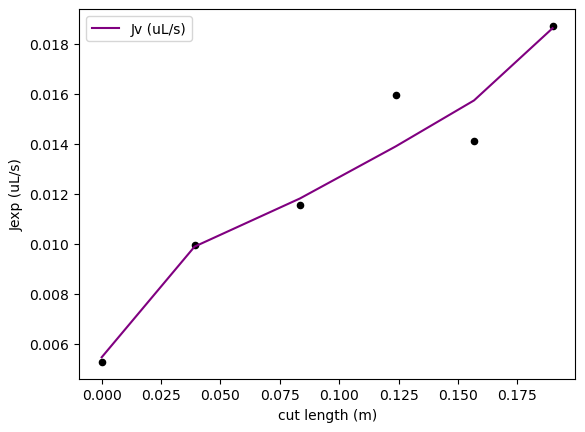

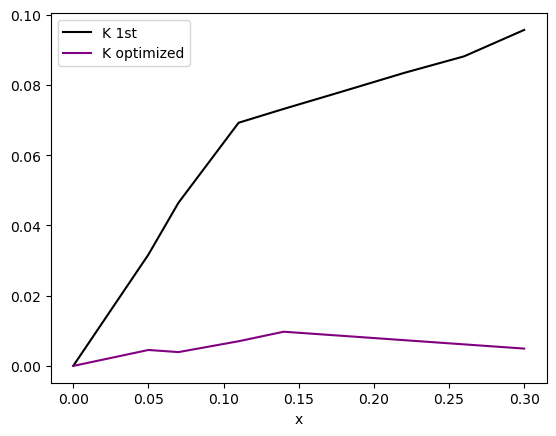

interactive(children=(Dropdown(description='cut', options=('tot', '0.259901734', '0.215540991', '0.175238221',…

running time is  54.70750665664673


<Figure size 640x480 with 0 Axes>

In [33]:
%run adjustment_K_and_k.py parameters_Ctr-3P2.yml -op -o results.csv